### Deliverable 1: Preprocessing the Data for a Neural Network

In [20]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
!pip install tensorflow
!pip install sklearn
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv(r"C:\Users\DLH\Documents\Module 19\charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

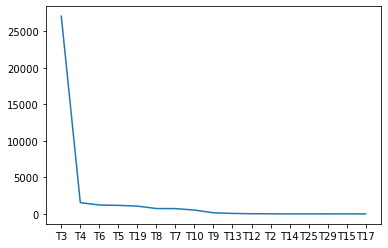

In [6]:
# Visualize the value counts of APPLICATION_TYPE
import matplotlib.pyplot as plt
plt.plot(application_df["APPLICATION_TYPE"].value_counts())

In [7]:
# Determine which values to replace if counts are less than ...?

replace_application = application_df["APPLICATION_TYPE"].value_counts() > 10

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4500        1
C1820        1
C4200        1
C2190        1
C4120        1
Name: CLASSIFICATION, Length: 71, dtype: int64

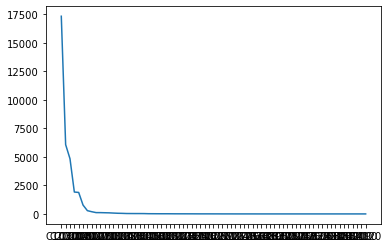

In [9]:
# Visualize the value counts of CLASSIFICATION
plt.plot(application_df["CLASSIFICATION"].value_counts())
#  YOUR CODE GOES HERE

In [10]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = application_df["CLASSIFICATION"].value_counts() > 10

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4500        1
C1820        1
C4200        1
C2190        1
C4120        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
num_cols = application_df._get_numeric_data().columns
application_cat = list(set(application_df.columns)-set(num_cols))
print(application_cat)

['ORGANIZATION', 'APPLICATION_TYPE', 'SPECIAL_CONSIDERATIONS', 'USE_CASE', 'INCOME_AMT', 'AFFILIATION', 'CLASSIFICATION']


In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,...,CLASSIFICATION_C6000,CLASSIFICATION_C6100,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_C8210
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)

In [26]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop(["IS_SUCCESSFUL"],axis=1)
y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T12',
       'APPLICATION_TYPE_T13',
       ...
       'CLASSIFICATION_C6000', 'CLASSIFICATION_C6100', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_C7100', 'CLASSIFICATION_C7120', 'CLASSIFICATION_C7200',
       'CLASSIFICATION_C7210', 'CLASSIFICATION_C8000', 'CLASSIFICATION_C8200',
       'CLASSIFICATION_C8210'],
      dtype='object', length=117)

### Deliverable 2: Compile, Train and Evaluate the Model

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=10,activation="relu",input_dim=116))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=3,activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                1170      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/100
858/858 [==============================] - 1s 718us/step - loss: 0.6548 - accuracy: 0.6430
Epoch 2/100
858/858 [==============================] - 1s 717us/step - loss: 0.5871 - accuracy: 0.7246
Epoch 3/100
858/858 [==============================] - 1s 777us/step - loss: 0.5768 - accuracy: 0.7252
Epoch 4/100
858/858 [==============================] - 1s 754us/step - loss: 0.5732 - accuracy: 0.7270
Epoch 5/100
858/858 [==============================] - 1s 716us/step - loss: 0.5728 - accuracy: 0.7253
Epoch 6/100
858/858 [==============================] - 1s 688us/step - loss: 0.5671 - accuracy: 0.7309
Epoch 7/100
858/858 [==============================] - 1s 684us/step - loss: 0.5626 - accuracy: 0.7328
Epoch 8/100
858/858 [==============================] - 1s 681us/step - loss: 0.5638 - accuracy: 0.7299
Epoch 9/100
858/858 [==============================] - 1s 685us/step - loss: 0.5621 - accuracy: 0.7299
Epoch 10/100
858/858 [==============================] - 1s 674us/step - l

858/858 [==============================] - 1s 676us/step - loss: 0.5420 - accuracy: 0.7394
Epoch 80/100
858/858 [==============================] - 1s 667us/step - loss: 0.5388 - accuracy: 0.7401
Epoch 81/100
858/858 [==============================] - 1s 677us/step - loss: 0.5426 - accuracy: 0.7394
Epoch 82/100
858/858 [==============================] - 1s 687us/step - loss: 0.5453 - accuracy: 0.7351
Epoch 83/100
858/858 [==============================] - 1s 723us/step - loss: 0.5412 - accuracy: 0.7392
Epoch 84/100
858/858 [==============================] - 1s 762us/step - loss: 0.5392 - accuracy: 0.7393
Epoch 85/100
858/858 [==============================] - 1s 721us/step - loss: 0.5414 - accuracy: 0.7356
Epoch 86/100
858/858 [==============================] - 1s 683us/step - loss: 0.5377 - accuracy: 0.7401
Epoch 87/100
858/858 [==============================] - 1s 675us/step - loss: 0.5374 - accuracy: 0.7406
Epoch 88/100
858/858 [==============================] - 1s 682us/step - loss:

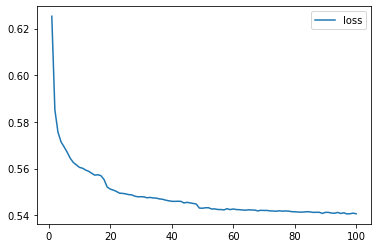

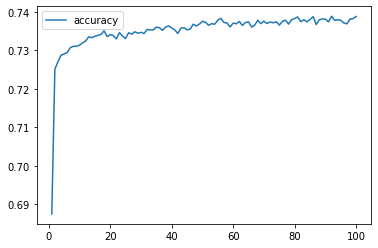

In [37]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, Y_train, epochs=100)
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5643 - accuracy: 0.7210
Loss: 0.5642784833908081, Accuracy: 0.7209912538528442
